In [274]:
import numpy as np
import pandas as pd

In [275]:
df_iris = pd.read_csv('iris.csv')
df_amazon = pd.read_csv('amazon.csv')

In [276]:
df_iris.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [277]:
# df_iris.info()
# df_iris.describe()
df_iris.sample(5)


,sepal.length,sepal.width,petal.length,petal.width,variety
2,4.7,3.2,1.3,0.2,Setosa
19,NaN,3.8,1.5,0.3,Setosa
148,6.2,3.4,5.4,2.3,Virginica
41,4.5,2.3,1.3,0.3,Setosa
83,6.0,2.7,5.1,1.6,Versicolor


In [278]:
df_iris['variety'].value_counts()

variety
Setosa        50
Virginica     50
Versicolor    49
Name: count, dtype: int64

In [279]:
df_iris.isnull().sum()

sepal.length    3
sepal.width     3
petal.length    3
petal.width     1
variety         1
dtype: int64

In [280]:
df_iris['sepal.width'].fillna(df_iris['sepal.width'].mean(),inplace=True);
df_iris['sepal.length'].fillna(df_iris['sepal.length'].mean(),inplace=True);
df_iris['petal.length'].fillna(df_iris['petal.length'].mean(),inplace=True);
df_iris['petal.width'].fillna(df_iris['petal.width'].mean(),inplace=True);
df_iris['variety'].fillna(df_iris['variety'].mode()[0],inplace=True);

C:\Users\HP\AppData\Local\Temp\ipykernel_20096\1419915479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_iris['sepal.width'].fillna(df_iris['sepal.width'].mean(),inplace=True);
C:\Users\HP\AppData\Local\Temp\ipykernel_20096\1419915479.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [281]:
df_iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [282]:
df_iris.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [283]:
# Convert variety to categorical codes
df_iris['variety'] = df_iris['variety'].astype('category')
# print(df_iris['variety'].astype('category').drop_duplicates())
df_iris['variety_encoded'] = df_iris['variety'].cat.codes

# Optional: check mapping
print(df_iris[['variety', 'variety_encoded']].drop_duplicates())


        variety  variety_encoded
0        Setosa                0
50   Versicolor                1
100   Virginica                2


In [284]:
from sklearn.preprocessing import OrdinalEncoder

# Create encoder
enc = OrdinalEncoder()

# Fit and transform the 'variety' column
df_iris[['variety_encoded']] = enc.fit_transform(df_iris[['variety']])

# Optional: convert to category
df_iris['variety_encoded'] = df_iris['variety_encoded'].astype('category')

print(df_iris[['variety', 'variety_encoded']].drop_duplicates())


        variety variety_encoded
0        Setosa             0.0
50   Versicolor             1.0
100   Virginica             2.0


In [285]:
df_iris.sample(10)

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_encoded
63,6.100000,2.9,4.700000,1.4,Versicolor,1.0
147,6.500000,3.0,5.200000,2.0,Virginica,2.0
27,5.847619,3.5,1.500000,0.2,Setosa,0.0
138,6.000000,3.0,4.800000,1.8,Virginica,2.0
101,5.800000,2.7,5.100000,1.9,Virginica,2.0
88,5.600000,3.0,4.100000,1.3,Versicolor,1.0
30,4.800000,3.1,3.782313,0.2,Setosa,0.0
106,4.900000,2.5,4.500000,1.7,Virginica,2.0
65,6.700000,3.1,4.400000,1.4,Versicolor,1.0
91,6.100000,3.0,4.600000,1.4,Versicolor,1.0


In [286]:
from sklearn.preprocessing import MaxAbsScaler

# Min-Max Scaling for 'sepal.length'
df_iris['sepal.length_minmax'] = (
    (df_iris['sepal.length'] - df_iris['sepal.length'].min()) /
    (df_iris['sepal.length'].max() - df_iris['sepal.length'].min())
)

# MaxAbs Scaling for 'sepal.length'
# abs_scaler = MaxAbsScaler()
df_iris['sepal.length_maxabs'] = MaxAbsScaler().fit_transform(df_iris[['sepal.length']])


In [287]:
df_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_encoded,sepal.length_minmax,sepal.length_maxabs
0,5.1,3.5,1.4,0.2,Setosa,0.0,0.222222,0.645570
1,4.9,3.0,1.4,0.2,Setosa,0.0,0.166667,0.620253
2,4.7,3.2,1.3,0.2,Setosa,0.0,0.111111,0.594937
3,4.6,3.1,1.5,0.2,Setosa,0.0,0.083333,0.582278
4,5.0,3.6,1.4,0.2,Setosa,0.0,0.194444,0.632911


In [288]:
from sklearn.preprocessing import MaxAbsScaler

# -------------------------------
# Min-Max Normalization (Manual)
# -------------------------------
# Apply on all numerical columns
numerical_cols = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

# Apply Min-Max scaling
for col in numerical_cols:
    df_iris[col + '_minmax'] = (df_iris[col] - df_iris[col].min()) / (df_iris[col].max() - df_iris[col].min())

# -------------------------------
# MaxAbsScaler (Sklearn)
# -------------------------------
scaler = MaxAbsScaler()
df_iris_maxabs = scaler.fit_transform(df_iris[numerical_cols])

# Add back to the dataframe
for i, col in enumerate(numerical_cols):
    df_iris[col + '_maxabs'] = df_iris_maxabs[:, i]

# -------------------------------
# Display the results
# -------------------------------
print(df_iris[[col + '_minmax' for col in numerical_cols]].head())
print(df_iris[[col + '_maxabs' for col in numerical_cols]].head())


   sepal.length_minmax  sepal.width_minmax  petal.length_minmax  \
0             0.222222            0.625000             0.067797   
1             0.166667            0.416667             0.067797   
2             0.111111            0.500000             0.050847   
3             0.083333            0.458333             0.084746   
4             0.194444            0.666667             0.067797   

   petal.width_minmax  
0            0.041667  
1            0.041667  
2            0.041667  
3            0.041667  
4            0.041667  
   sepal.length_maxabs  sepal.width_maxabs  petal.length_maxabs  \
0             0.645570            0.795455             0.202899   
1             0.620253            0.681818             0.202899   
2             0.594937            0.727273             0.188406   
3             0.582278            0.704545             0.217391   
4             0.632911            0.818182             0.202899   

   petal.width_maxabs  
0                0.08  
1 

In [289]:
df_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_encoded,sepal.length_minmax,sepal.length_maxabs,sepal.width_minmax,petal.length_minmax,petal.width_minmax,sepal.width_maxabs,petal.length_maxabs,petal.width_maxabs
0,5.1,3.5,1.4,0.2,Setosa,0.0,0.222222,0.645570,0.625000,0.067797,0.041667,0.795455,0.202899,0.08
1,4.9,3.0,1.4,0.2,Setosa,0.0,0.166667,0.620253,0.416667,0.067797,0.041667,0.681818,0.202899,0.08
2,4.7,3.2,1.3,0.2,Setosa,0.0,0.111111,0.594937,0.500000,0.050847,0.041667,0.727273,0.188406,0.08
3,4.6,3.1,1.5,0.2,Setosa,0.0,0.083333,0.582278,0.458333,0.084746,0.041667,0.704545,0.217391,0.08
4,5.0,3.6,1.4,0.2,Setosa,0.0,0.194444,0.632911,0.666667,0.067797,0.041667,0.818182,0.202899,0.08


In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

In [291]:
df_iris.columns = df_iris.columns.str.replace(' (cm)', '', regex=False)
df_iris.rename(columns={
    'sepal length': 'sepal_length',
    'sepal width': 'sepal_width',
    'petal length': 'petal_length',
    'petal width': 'petal_width'
}, inplace=True)

ValueError: Could not interpret value `sepal_length` for `x`. An entry with this name does not appear in `data`.

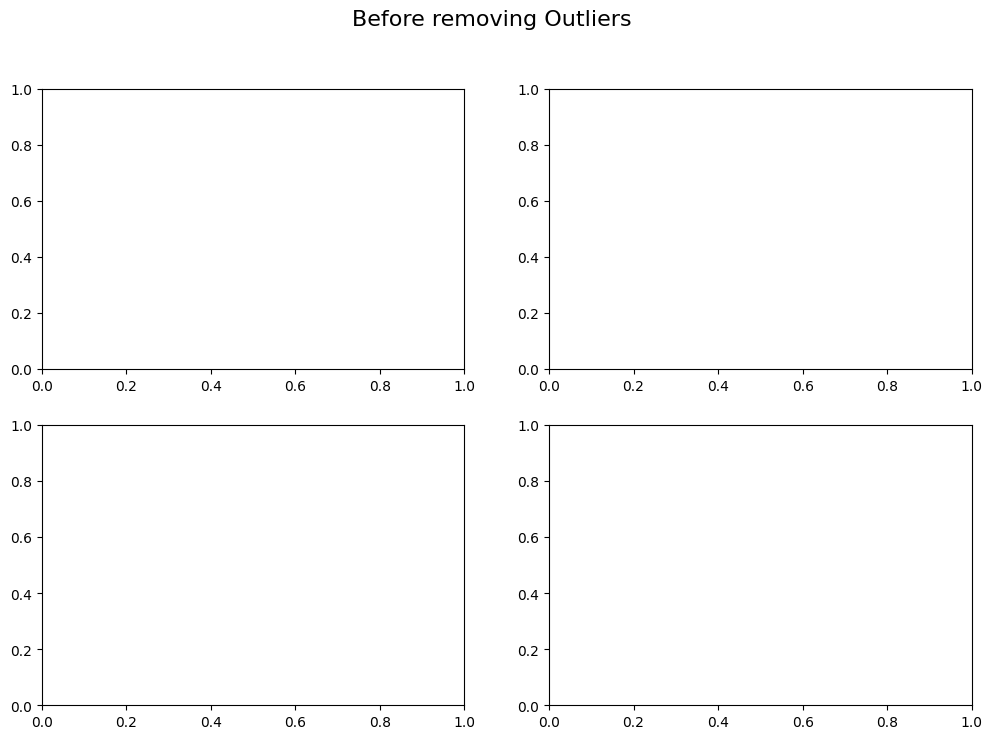

In [292]:
# --------------------------
# Step 2: Plot Before Removing Outliers
# --------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Before removing Outliers', fontsize=16)

sns.boxplot(data=df_iris, x='sepal_length', ax=axes[0, 0])
sns.boxplot(data=df_iris, x='sepal_width', ax=axes[0, 1])
sns.boxplot(data=df_iris, x='petal_length', ax=axes[1, 0])
sns.boxplot(data=df_iris, x='petal_width', ax=axes[1, 1])

plt.tight_layout()
plt.show()

# --------------------------
# Step 3: Outlier Detection and Removal Function
# --------------------------
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"\n{column.upper()} - Lower bound: {lower}, Upper bound: {upper}")
    print(f"Outliers found in {column}: {len(outliers)}")

    return df[(df[column] >= lower) & (df[column] <= upper)]

# --------------------------
# Step 4: Remove Outliers From All Numeric Columns
# --------------------------
df_cleaned = df_iris.copy()
for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    df_cleaned = remove_outliers(df_cleaned, col)

# --------------------------
# Step 5: Plot After Removing Outliers
# --------------------------
fig, axes = plt.subplots(2, 2)
fig.suptitle('After removing Outliers')

sns.boxplot(data=df_cleaned, x='sepal_length', ax=axes[0, 0])
sns.boxplot(data=df_cleaned, x='sepal_width', ax=axes[0, 1])
sns.boxplot(data=df_cleaned, x='petal_length', ax=axes[1, 0])
sns.boxplot(data=df_cleaned, x='petal_width', ax=axes[1, 1])

plt.tight_layout()
plt.show()


In [ ]:
df_iris.sample(5)

In [ ]:
print('sepal_length:', df_iris['sepal.length'].skew())
print('sepal_width:', df_iris['sepal.width'].skew())
print('petal_length:', df_iris['petal.length'].skew())
print('petal_width:', df_iris['petal.width'].skew())

In [ ]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Handling Data Skewness')
sns.histplot(ax = axes[0,0], data = df_iris['sepal.length'], kde=True)
sns.histplot(ax = axes[0,1], data = df_iris['sepal.width'], kde=True)
sns.histplot(ax = axes[1,0], data = df_iris['petal.length'], kde=True)
sns.histplot(ax = axes[1,1], data = df_iris['petal.width'], kde=True)

In [ ]:
df_iris.head()

In [ ]:
from sklearn.preprocessing import PowerTransformer
yeo = PowerTransformer(standardize=True)
df_iris['sepal.length'] = yeo.fit_transform(df_iris['sepal.length'].values.reshape(-1,1))
df_iris['sepal.width'] = yeo.fit_transform(df_iris['sepal.width'].values.reshape(-1,1))

In [ ]:
df_iris.head()

In [ ]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Handling Data Skewness')
sns.histplot(ax = axes[0,0], data = df_iris['sepal.length'], kde=True)
sns.histplot(ax = axes[0,1], data = df_iris['sepal.width'], kde=True)
sns.histplot(ax = axes[1,0], data = df_iris['petal.length'], kde=True)
sns.histplot(ax = axes[1,1], data = df_iris['petal.width'], kde=True)